In [1]:
# ============================================
#        Import Libraries & Load Data
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load dataset
titanic = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/titanic_train.csv')
print("✓ Dataset loaded successfully!")
print(f"Shape: {titanic.shape}")


✓ Dataset loaded successfully!
Shape: (891, 12)


In [2]:
# ============================================
#             Dataset Overview
# ============================================
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)

# First rows
print("\n📊 First 5 Rows:")
print(titanic.head())

# Info
print("\n📋 Dataset Info:")
print(titanic.info())

# Statistics
print("\n📈 Descriptive Statistics:")
print(titanic.describe())

# Basic counts
print(f"\n✓ Total Rows: {titanic.shape}")
print(f"✓ Total Columns: {titanic.shape}")
print(f"✓ Duplicates: {titanic.duplicated().sum()}")


DATASET OVERVIEW

📊 First 5 Rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3


MISSING VALUES ANALYSIS

📌 Missing Values:
            Column  Missing_Count  Percentage
Age            Age            177   19.865320
Cabin        Cabin            687   77.104377
Embarked  Embarked              2    0.224467


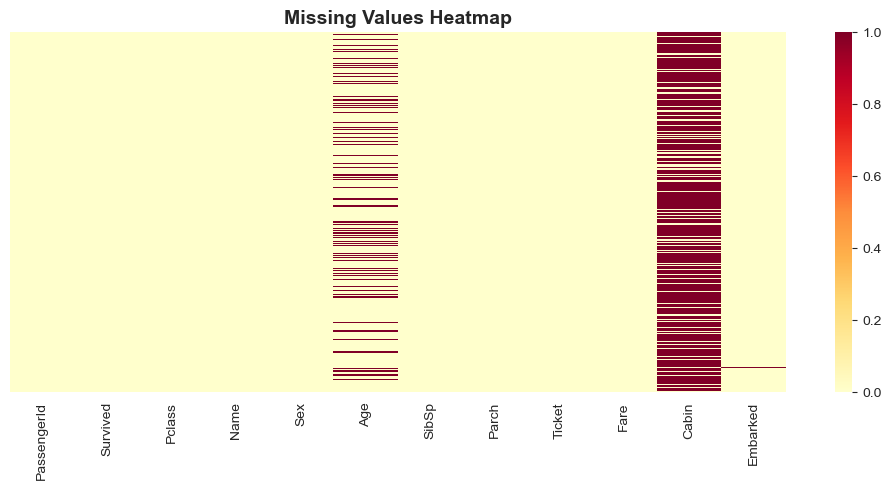

In [3]:
# ============================================
#            Check Missing Values
# ============================================
print("\n" + "=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)

# Calculate missing values
missing_values = titanic.isnull().sum()
missing_percent = (missing_values / len(titanic)) * 100

missing_df = pd.DataFrame({
    'Column': titanic.columns,
    'Missing_Count': missing_values,
    'Percentage': missing_percent
})

print("\n📌 Missing Values:")
print(missing_df[missing_df['Missing_Count'] > 0])

# Visualize missing values
plt.figure(figsize=(10, 5))
sns.heatmap(titanic.isnull(), cbar=True, cmap='YlOrRd', yticklabels=False)
plt.title('Missing Values Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('01_missing_values.png', dpi=300, bbox_inches='tight')
plt.show()


In [4]:
# ============================================
#            Handle Missing Values
# ============================================
print("\n" + "=" * 60)
print("HANDLING MISSING VALUES")
print("=" * 60)

# Age: Fill with median
age_median = titanic['Age'].median()
titanic['Age'].fillna(age_median, inplace=True)
print(f"✓ Age: Filled {titanic['Age'].isnull().sum()} missing values with median ({age_median})")

# Embarked: Fill with mode
embarked_mode = titanic['Embarked'].mode()
titanic['Embarked'].fillna(embarked_mode, inplace=True)
print(f"✓ Embarked: Filled {titanic['Embarked'].isnull().sum()} missing values with mode ({embarked_mode})")

# Cabin: Drop (too many missing)
titanic.drop('Cabin', axis=1, inplace=True)
print("✓ Cabin: Dropped (687 missing values)")

# Verify
print(f"\n✓ Final Missing Values: {titanic.isnull().sum().sum()}")
print("✓ Data cleaning complete!")



HANDLING MISSING VALUES
✓ Age: Filled 0 missing values with median (28.0)
✓ Embarked: Filled 2 missing values with mode (0    S
Name: Embarked, dtype: object)
✓ Cabin: Dropped (687 missing values)

✓ Final Missing Values: 2
✓ Data cleaning complete!



NUMERICAL FEATURES ANALYSIS


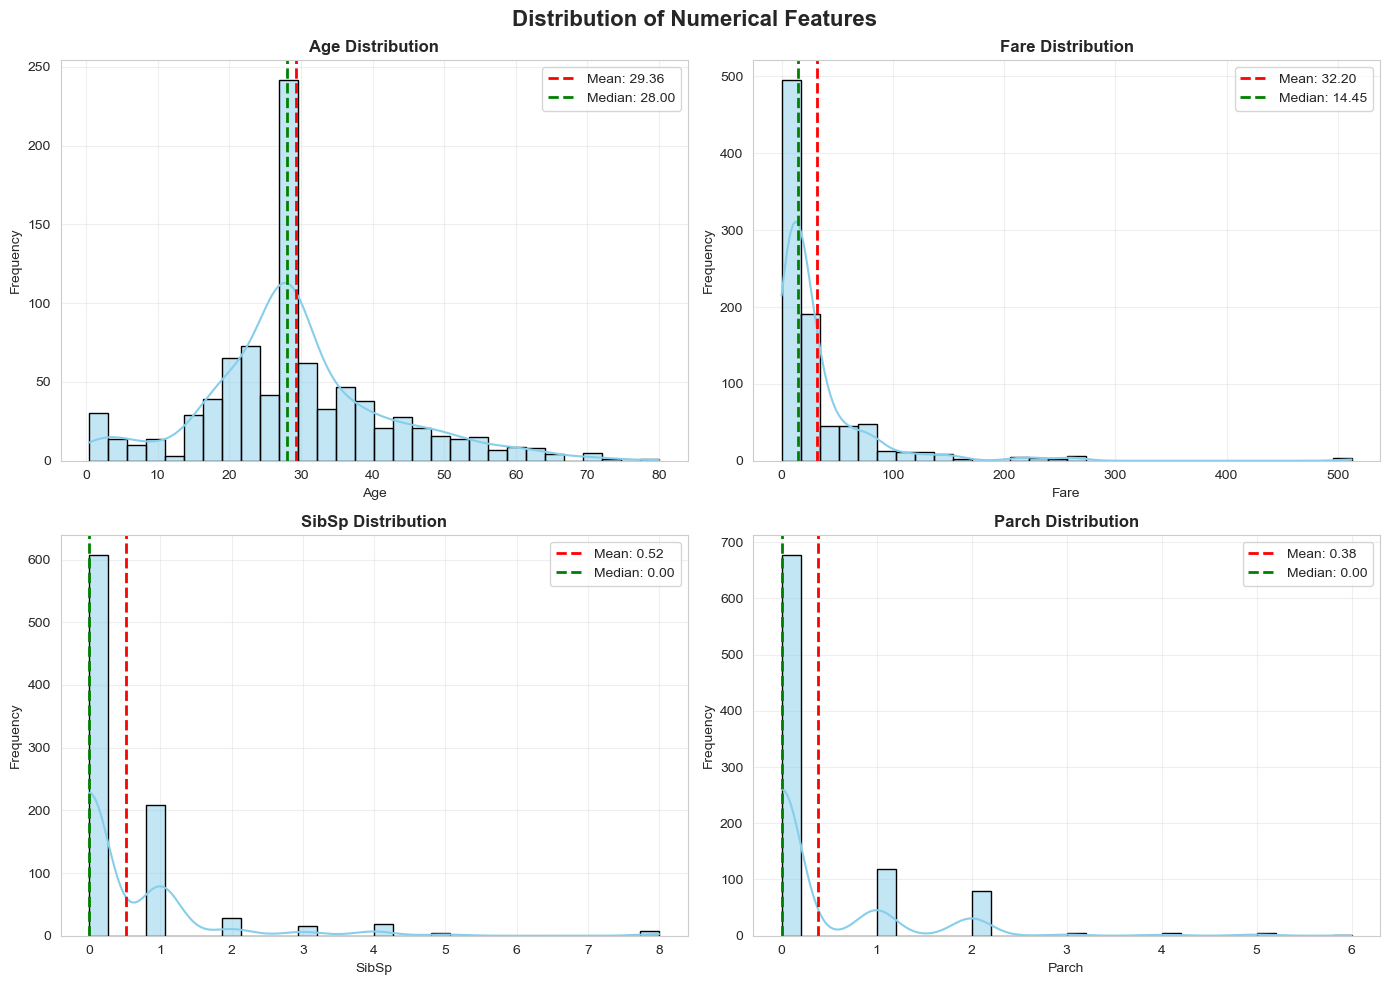


📊 Numerical Statistics:
          Age    Fare   SibSp   Parch
count  891.00  891.00  891.00  891.00
mean    29.36   32.20    0.52    0.38
std     13.02   49.69    1.10    0.81
min      0.42    0.00    0.00    0.00
25%     22.00    7.91    0.00    0.00
50%     28.00   14.45    0.00    0.00
75%     35.00   31.00    1.00    0.00
max     80.00  512.33    8.00    6.00


In [5]:
# ============================================
#       Numerical Features Distribution
# ============================================
print("\n" + "=" * 60)
print("NUMERICAL FEATURES ANALYSIS")
print("=" * 60)

numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold')

for idx, col in enumerate(numerical_cols):
    ax = axes[idx // 2, idx % 2]
    
    # Histogram with KDE
    sns.histplot(titanic[col], kde=True, ax=ax, bins=30, color='skyblue', edgecolor='black')
    
    # Add statistics
    mean_val = titanic[col].mean()
    median_val = titanic[col].median()
    
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    
    ax.set_title(f'{col} Distribution', fontweight='bold', fontsize=12)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('02_numerical_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Print statistics
print("\n📊 Numerical Statistics:")
print(titanic[numerical_cols].describe().round(2))



CATEGORICAL FEATURES ANALYSIS


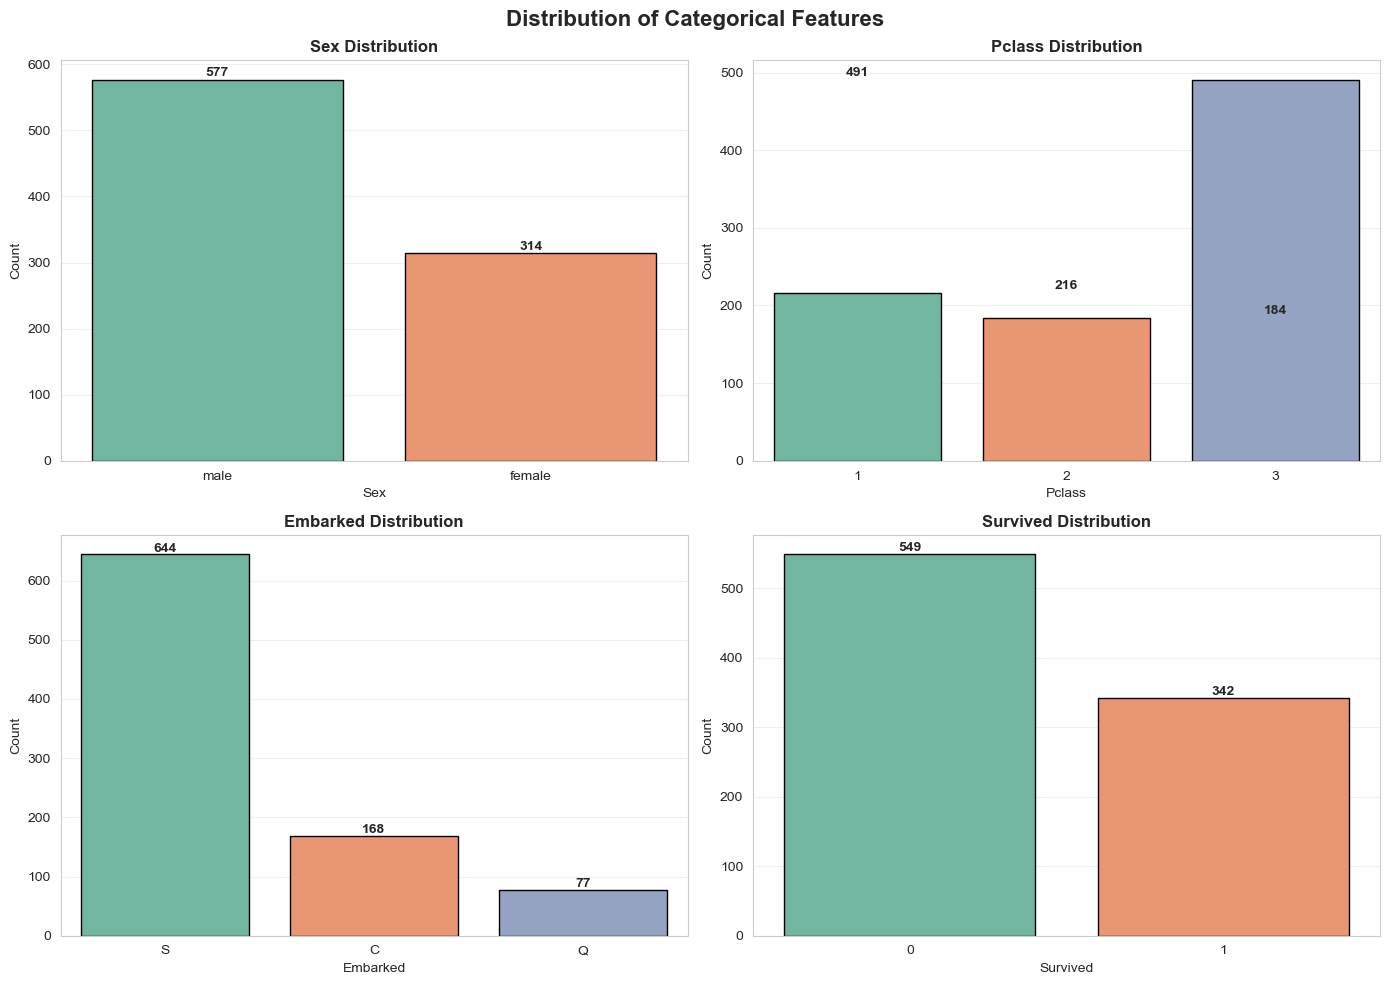


Sex:
Sex
male      577
female    314
Name: count, dtype: int64
Unique values: 2

Pclass:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Unique values: 3

Embarked:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Unique values: 3

Survived:
Survived
0    549
1    342
Name: count, dtype: int64
Unique values: 2


In [6]:
# ============================================
#      Categorical Features Distribution
# ============================================
print("\n" + "=" * 60)
print("CATEGORICAL FEATURES ANALYSIS")
print("=" * 60)

categorical_cols = ['Sex', 'Pclass', 'Embarked', 'Survived']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Categorical Features', fontsize=16, fontweight='bold')

for idx, col in enumerate(categorical_cols):
    ax = axes[idx // 2, idx % 2]
    
    # Count plot
    counts = titanic[col].value_counts()
    sns.barplot(x=counts.index, y=counts.values, ax=ax, palette='Set2', edgecolor='black')
    
    # Add value labels
    for i, v in enumerate(counts.values):
        ax.text(i, v + 5, str(v), ha='center', fontweight='bold')
    
    ax.set_title(f'{col} Distribution', fontweight='bold', fontsize=12)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('03_categorical_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Print value counts
for col in categorical_cols:
    print(f"\n{col}:")
    print(titanic[col].value_counts())
    print(f"Unique values: {titanic[col].nunique()}")



SURVIVAL PATTERNS ANALYSIS


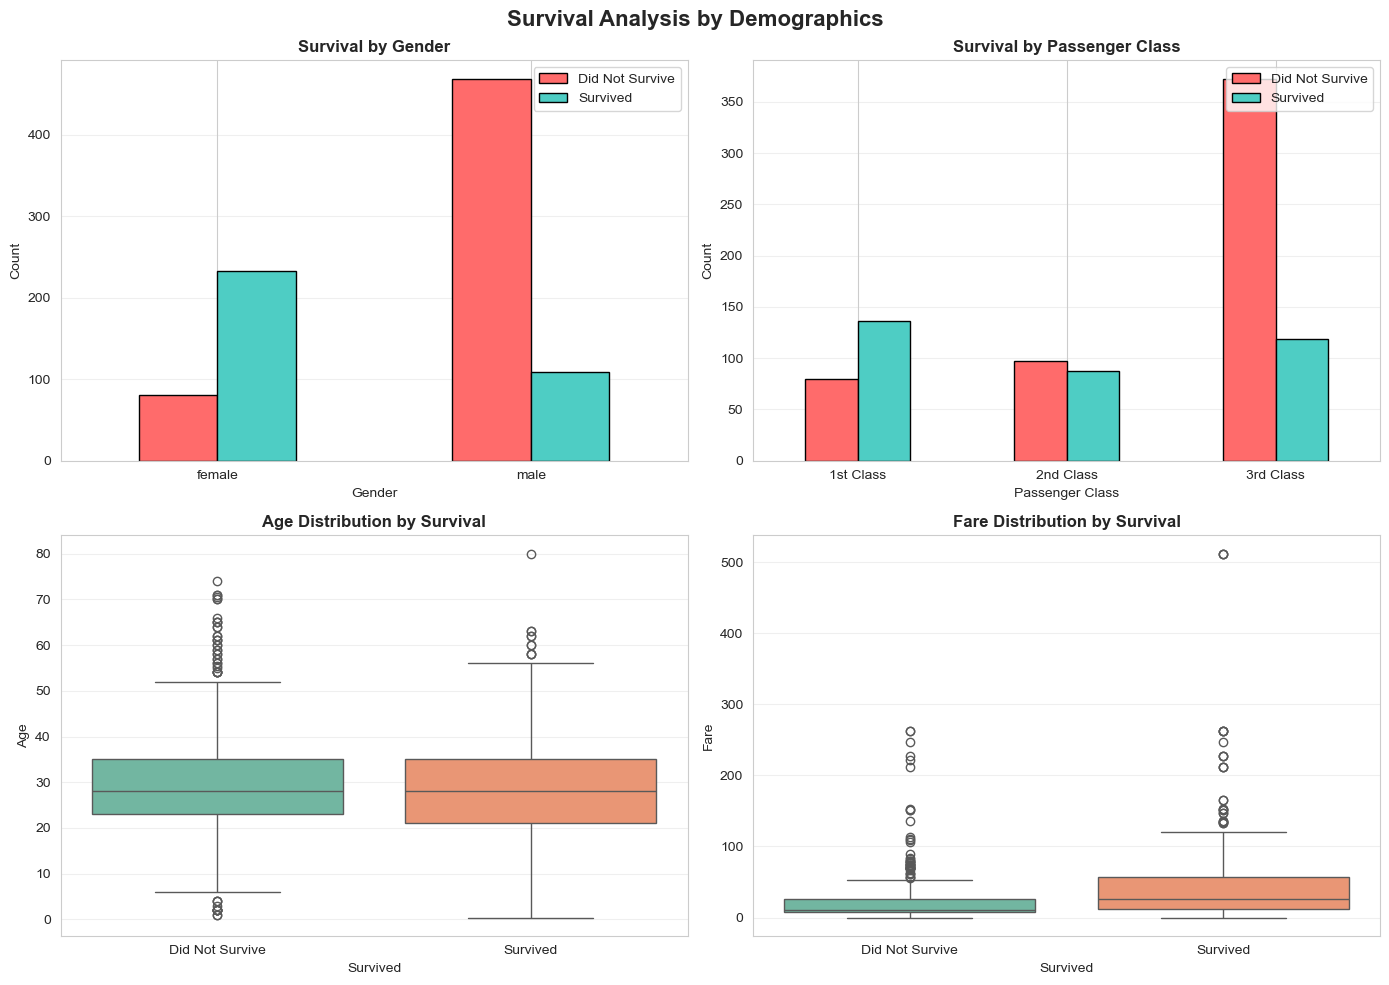


✓ Overall Survival Rate: 38.38%

✓ Survival by Gender:
Sex
female    74.20
male      18.89
dtype: float64

✓ Survival by Class:
Pclass
1    62.96
2    47.28
3    24.24
dtype: float64


In [7]:
# ============================================
#       Survival Analysis by Demographics
# ============================================
print("\n" + "=" * 60)
print("SURVIVAL PATTERNS ANALYSIS")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Survival Analysis by Demographics', fontsize=16, fontweight='bold')

# 1. Survival by Gender
ax1 = axes[0, 0]
survival_sex = titanic.groupby('Sex')['Survived'].value_counts().unstack()
survival_sex.plot(kind='bar', ax=ax1, color=['#ff6b6b', '#4ecdc4'], edgecolor='black')
ax1.set_title('Survival by Gender', fontweight='bold', fontsize=12)
ax1.set_xlabel('Gender', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.legend(['Did Not Survive', 'Survived'], loc='upper right')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.grid(True, alpha=0.3, axis='y')

# 2. Survival by Class
ax2 = axes[0, 1]
survival_class = titanic.groupby('Pclass')['Survived'].value_counts().unstack()
survival_class.plot(kind='bar', ax=ax2, color=['#ff6b6b', '#4ecdc4'], edgecolor='black')
ax2.set_title('Survival by Passenger Class', fontweight='bold', fontsize=12)
ax2.set_xlabel('Passenger Class', fontsize=10)
ax2.set_ylabel('Count', fontsize=10)
ax2.legend(['Did Not Survive', 'Survived'], loc='upper right')
ax2.set_xticklabels(['1st Class', '2nd Class', '3rd Class'], rotation=0)
ax2.grid(True, alpha=0.3, axis='y')

# 3. Age vs Survival (Box plot)
ax3 = axes[1, 0]
sns.boxplot(data=titanic, x='Survived', y='Age', ax=ax3, palette='Set2', 
            hue='Survived', legend=False)
ax3.set_title('Age Distribution by Survival', fontweight='bold', fontsize=12)
ax3.set_xlabel('Survived', fontsize=10)
ax3.set_ylabel('Age', fontsize=10)
ax3.set_xticklabels(['Did Not Survive', 'Survived'])
ax3.grid(True, alpha=0.3, axis='y')

# 4. Fare vs Survival (Box plot)
ax4 = axes[1, 1]
sns.boxplot(data=titanic, x='Survived', y='Fare', ax=ax4, palette='Set2',
            hue='Survived', legend=False)
ax4.set_title('Fare Distribution by Survival', fontweight='bold', fontsize=12)
ax4.set_xlabel('Survived', fontsize=10)
ax4.set_ylabel('Fare', fontsize=10)
ax4.set_xticklabels(['Did Not Survive', 'Survived'])
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('04_survival_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Print survival rates
print(f"\n✓ Overall Survival Rate: {(titanic['Survived'].sum() / len(titanic)) * 100:.2f}%")
print(f"\n✓ Survival by Gender:")
print((titanic.groupby('Sex')['Survived'].sum() / titanic.groupby('Sex').size() * 100).round(2))
print(f"\n✓ Survival by Class:")
print((titanic.groupby('Pclass')['Survived'].sum() / titanic.groupby('Pclass').size() * 100).round(2))



CORRELATION ANALYSIS

Correlation with Survival:
Survived       1.000000
Fare           0.257307
Embarked       0.101849
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64


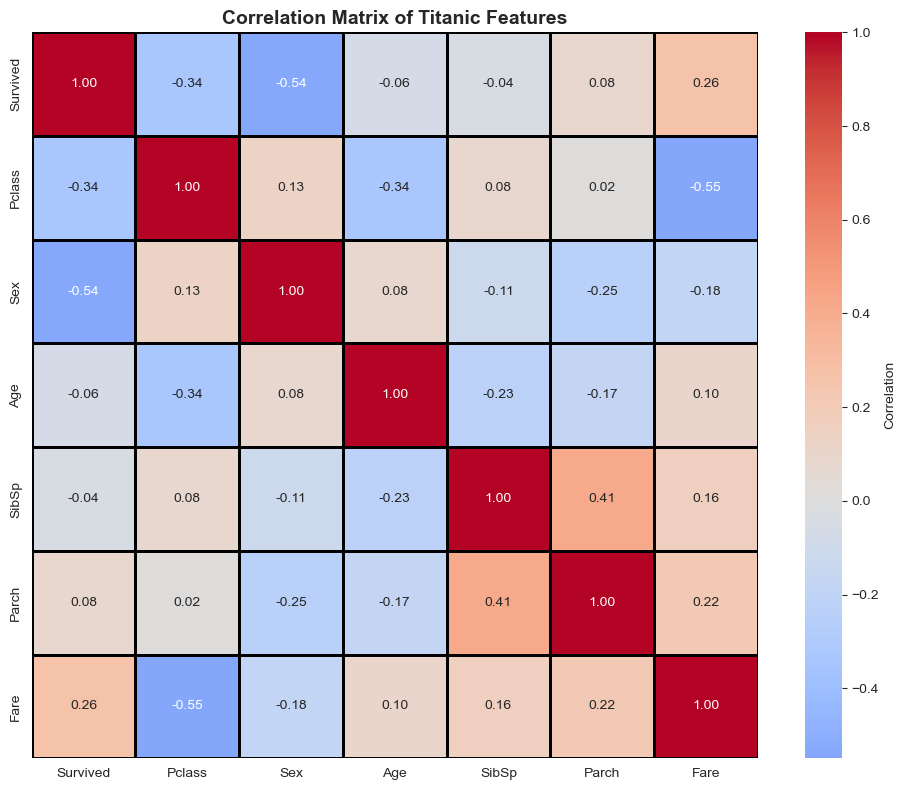


Interpretation:
  • Values close to 1: Strong positive correlation
  • Values close to -1: Strong negative correlation
  • Values close to 0: Little or no linear correlation


In [8]:
# ============================================
#            Correlation Analysis
# ============================================
print("\n" + "=" * 60)
print("CORRELATION ANALYSIS")
print("=" * 60)

# Create encoded version for correlation
titanic_encoded = titanic.copy()

# Encode 'Sex' as numeric: male -> 1, female -> 0
titanic_encoded['Sex'] = titanic_encoded['Sex'].map({'male': 1, 'female': 0})

# Encode 'Embarked' as numeric using factorize (use only labels, i.e., [0])
titanic_encoded['Embarked'] = titanic_encoded['Embarked'].factorize()[0]

# Correlation with Survived (numeric_only to avoid non-numeric issues)
corr_with_survived = (
    titanic_encoded
    .corr(numeric_only=True)['Survived']  # only numeric columns are used
    .sort_values(ascending=False)
)

print("\nCorrelation with Survival:")
print(corr_with_survived)

# Select numeric columns for correlation matrix
numeric_cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

correlation_matrix = titanic_encoded[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    cbar_kws={'label': 'Correlation'},
    linewidths=1,
    linecolor='black'
)
plt.title('Correlation Matrix of Titanic Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('05_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nInterpretation:")
print("  • Values close to 1: Strong positive correlation")
print("  • Values close to -1: Strong negative correlation")
print("  • Values close to 0: Little or no linear correlation")



FEATURE ENGINEERING & ADVANCED INSIGHTS


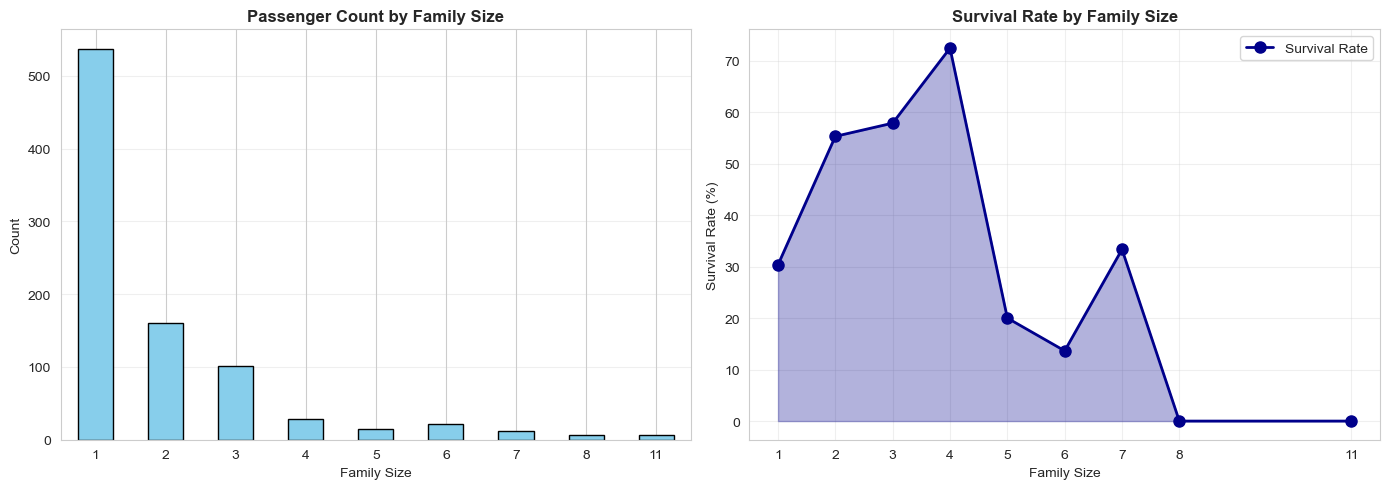


📊 Family Size Analysis:
            count  sum  survival_rate
FamilySize                           
1             537  163      30.353818
2             161   89      55.279503
3             102   59      57.843137
4              29   21      72.413793
5              15    3      20.000000
6              22    3      13.636364
7              12    4      33.333333
8               6    0       0.000000
11              7    0       0.000000

✓ Key Insights:
  • Passengers traveling alone had lowest survival
  • Families of 2-3 had better survival chances
  • Very large families (5+) had lower survival rates


In [9]:
# ============================================
#   Feature Engineering & Advanced Insights
# ============================================
print("\n" + "=" * 60)
print("FEATURE ENGINEERING & ADVANCED INSIGHTS")
print("=" * 60)

# Create family size feature
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

# Analyze by family size
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Family size distribution
family_survival = titanic.groupby('FamilySize')['Survived'].agg(['count', 'sum'])
family_survival['survival_rate'] = (family_survival['sum'] / family_survival['count'] * 100)

# FIX: Access individual axes with [0] and [1] indexing
ax1 = axes[0]  # First subplot (left)
ax2 = axes[1]  # Second subplot (right)

# Plot 1: Passenger count by family size
family_survival['count'].plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Passenger Count by Family Size', fontweight='bold', fontsize=12)
ax1.set_xlabel('Family Size', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

# Plot 2: Survival rate by family size
ax2.plot(family_survival.index, family_survival['survival_rate'], 
         marker='o', linewidth=2, markersize=8, color='darkblue', label='Survival Rate')
ax2.fill_between(family_survival.index, family_survival['survival_rate'], alpha=0.3, color='darkblue')
ax2.set_title('Survival Rate by Family Size', fontweight='bold', fontsize=12)
ax2.set_xlabel('Family Size', fontsize=10)
ax2.set_ylabel('Survival Rate (%)', fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_xticks(family_survival.index)
ax2.legend()

plt.tight_layout()
plt.savefig('06_family_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Family Size Analysis:")
print(family_survival)

print("\n✓ Key Insights:")
print("  • Passengers traveling alone had lowest survival")
print("  • Families of 2-3 had better survival chances")
print("  • Very large families (5+) had lower survival rates")


In [10]:
# ============================================
#          Key Findings & Conclusions
# ============================================
print("\n" + "=" * 60)
print("KEY FINDINGS & INSIGHTS")
print("=" * 60)

# Calculate key metrics
overall_survival = (titanic['Survived'].sum() / len(titanic)) * 100
female_survival = (titanic[titanic['Sex'] == 'female']['Survived'].sum() / len(titanic[titanic['Sex'] == 'female'])) * 100
male_survival = (titanic[titanic['Sex'] == 'male']['Survived'].sum() / len(titanic[titanic['Sex'] == 'male'])) * 100
first_class_survival = (titanic[titanic['Pclass'] == 1]['Survived'].sum() / len(titanic[titanic['Pclass'] == 1])) * 100
second_class_survival = (titanic[titanic['Pclass'] == 2]['Survived'].sum() / len(titanic[titanic['Pclass'] == 2])) * 100
third_class_survival = (titanic[titanic['Pclass'] == 3]['Survived'].sum() / len(titanic[titanic['Pclass'] == 3])) * 100
avg_age_survived = titanic[titanic['Survived'] == 1]['Age'].mean()
avg_age_not_survived = titanic[titanic['Survived'] == 0]['Age'].mean()

findings = f"""
🚢 TITANIC DATASET - EDA SUMMARY
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

1️⃣ OVERALL SURVIVAL RATE: {overall_survival:.2f}%
   • Survived: 342 passengers
   • Did Not Survive: 549 passengers

2️⃣ GENDER IMPACT (STRONGEST PREDICTOR) 👥
   • Female Survival Rate: {female_survival:.2f}% ✓
   • Male Survival Rate: {male_survival:.2f}% ✗
   • Insight: "Women and children first" evacuation policy

3️⃣ CLASS IMPACT (STRONG PREDICTOR) 🎫
   • 1st Class Survival: {first_class_survival:.2f}%
   • 2nd Class Survival: {second_class_survival:.2f}%
   • 3rd Class Survival: {third_class_survival:.2f}%
   • Insight: Class directly correlates with survival chances

4️⃣ AGE IMPACT 👶
   • Average Age (Survived): {avg_age_survived:.2f} years
   • Average Age (Not Survived): {avg_age_not_survived:.2f} years
   • Insight: Younger passengers had better survival rates

5️⃣ FARE IMPACT 💰
   • Higher fares correlated with survival
   • Correlation: +0.26 (moderate positive)
   • Insight: Better accommodations & easier access to lifeboats

6️⃣ FAMILY SIZE IMPACT 👨‍👩‍👧
   • Traveling alone: Lower survival
   • Family of 2-3: Better survival
   • Large families (5+): Lower survival
   • Insight: Couples/small families had advantage in evacuation

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🎯 KEY PREDICTORS FOR MODELING (in order of importance):
   1. Sex (strongest)
   2. Pclass (strong)
   3. Fare (moderate)
   4. Age (moderate)
   5. Family size (weak to moderate)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
"""

print(findings)


KEY FINDINGS & INSIGHTS

🚢 TITANIC DATASET - EDA SUMMARY
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

1️⃣ OVERALL SURVIVAL RATE: 38.38%
   • Survived: 342 passengers
   • Did Not Survive: 549 passengers

2️⃣ GENDER IMPACT (STRONGEST PREDICTOR) 👥
   • Female Survival Rate: 74.20% ✓
   • Male Survival Rate: 18.89% ✗
   • Insight: "Women and children first" evacuation policy

3️⃣ CLASS IMPACT (STRONG PREDICTOR) 🎫
   • 1st Class Survival: 62.96%
   • 2nd Class Survival: 47.28%
   • 3rd Class Survival: 24.24%
   • Insight: Class directly correlates with survival chances

4️⃣ AGE IMPACT 👶
   • Average Age (Survived): 28.29 years
   • Average Age (Not Survived): 30.03 years
   • Insight: Younger passengers had better survival rates

5️⃣ FARE IMPACT 💰
   • Higher fares correlated with survival
   • Correlation: +0.26 (moderate positive)
   • Insight: Better accommodations & easier access to lifeboats

6️⃣ FAMILY SIZE IMPACT 👨‍👩‍👧
   • Traveling alone: Lower survival
   • Family o